In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from __future__ import division
import os
import graphviz

import numpy as np
import pandas as pd
import scipy.stats as spstats

import matplotlib.pyplot as plt
import matplotlib as mpl 
mpl.rcParams['mathtext.fontset'] = 'cm' 
mpl.rcParams['mathtext.rm'] = 'serif'

from cana.boolean_node import BooleanNode
from cana.boolean_network import BooleanNetwork
from cana.datasets.bio import THALIANA, DROSOPHILA, BUDDING_YEAST, LEUKEMIA, BREAST_CANCER
from cana.random_boolean_network import regular_boolean_network, er_boolean_network
from cana.utils import *

In [4]:
T = THALIANA()
EG = T.effective_graph(bound='mean', threshold=0.0)
EGM = np.array(nx.to_numpy_matrix(EG))

In [9]:
node = 2
n_steps = 10
T.partial_derative_node(node, n_traj=0, t=n_steps)
#T.approx_dynamic_impact(n, n_steps=n_steps, mode='structural')

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [4]:
n_steps=10
n_traj = 10**1

influence = np.zeros((3, T.Nnodes, n_steps, T.Nnodes))
for n in range(T.Nnodes):
    print(n, T.get_node_name([n]))
    influence[0,n] = T.partial_derative_node(n, n_traj=0, t=n_steps)
    influence[1,n] = T.approx_dynamic_impact(n, n_steps=n_steps, mode='effective', bound='mean', 
                                                  min_log_prob=np.log(10**(-5)))
    influence[2,n] = T.approx_dynamic_impact(n, n_steps=n_steps, mode='structural',
                                                  min_log_prob=np.log(10**(-5)))
    

0 ['AP3']
1 ['UFO']
2 ['FUL']
3 ['FT']


KeyboardInterrupt: 

In [16]:
influence[1, 2]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [6]:
n_c = 2

corr_mat = np.zeros((n_c, T.Nnodes, n_steps)) 
for n in range(T.Nnodes):
    for step in range(n_steps):
        for ic in range(n_c):
            corr_mat[ic,n,step] = spstats.spearmanr(influence[0,n,step], influence[ic+1,n,step]).correlation

AP3
eff [0.73192505 0.73192505 0.62736433 0.62736433 0.62736433 0.62736433
 0.62736433 0.62736433 0.62736433 0.62736433]
int [0.73192505 0.73192505 0.62736433 0.62736433 0.62736433 0.62736433
 0.62736433 0.62736433 0.62736433 0.62736433]
UFO
eff [0.62736433 0.7163162  0.7163162  0.7163162  0.7163162  0.7163162
 0.7163162  0.7163162  0.7163162  0.7163162 ]
int [0.62736433 0.71382435 0.71382435 0.71382435 0.71382435 0.71382435
 0.71382435 0.71382435 0.71382435 0.71382435]
FUL
eff [nan nan nan nan nan nan nan nan nan nan]
int [nan nan nan nan nan nan nan nan nan nan]
FT
eff [1.         0.5965976  0.64044422 0.20015322 0.30758754 0.59938206
 0.60201214 0.27501719 0.4022469  0.4022469 ]
int [1.         0.41824289 0.41812101 0.4729152  0.28747979 0.80439967
 0.55614074 0.49940933 0.53819469 0.53819469]
AP1
eff [0.85682404 0.37139646 0.52747908 0.42525552 0.61071046 0.60708056
 0.56045817 0.72463279 0.71021819 0.71021819]
int [0.84381593 0.32020563 0.44224576 0.39159383 0.65434647 0.49978755


IndexError: pop from empty list

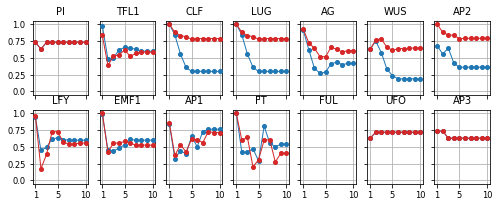

In [14]:
fig, axes = plt.subplots(2,7,figsize=(8.2,3), sharex=True, sharey=True) 
axes = axes.flatten()
axesl = axes.tolist()
i=0
for node in T.nodes: 
    print(node.name)
    print('eff',corr_mat[0,i,:]) 
    print('int',corr_mat[1,i,:]) 
    ax = axesl.pop()
    ys_eff = corr_mat[0,i,:] 
    ys_int = corr_mat[1,i,:]
    xs = np.arange(1,len(ys_eff)+1,1)
    #ax.fill_between( np.arange(1,n_steps+1), corrmean-corrstd, corrmean+corrstd

    ax.plot(xs, ys_int, c='#1f77b4', label='Interaction Graph',
    marker='o', ms=4, lw=1, ls='-', zorder=5) 
    ax.plot(xs, ys_eff, c='#d62728', label='Effective Graph', marker='o', ms=4, lw=1, ls='-', zorder=6)

    ax.set_title(node.name, fontsize='medium') 
    ax.set_xlim(0.5,10.5)
    ax.set_ylim(-0.05, 1.05)
    ax.set_xticks([1,5,10])
    ax.set_xticklabels([1,5,10], fontsize='small') 
    ax.set_yticks([0.0,0.25,0.5,0.75,1.0]) 
    ax.set_yticklabels([0.0,0.25,0.5,0.75,1.0], fontsize='small') 
    ax.grid(zorder=1)
    #ax.set(adjustable=, aspect=10)
    i += 1
axes[7].set_ylabel("Spearman's correlation", ha='left', fontsize='small') 
axes[10].set_xlabel(r'$n$ steps', fontsize='small')
plt.legend(loc='lower right', bbox_to_anchor=(1.07,-0.55), ncol=2, fontsize='small')
plt.subplots_adjust(left=0.07, right=0.99, bottom=0.17, top=0.9, wspace=0.2, hspace=0.2)
plt.savefig("ThalianaPerturbations.pdf")
plt.show()

In [5]:
bionet = BREAST_CANCER()
N = bionet.Nnodes

focusnodes = [3,4,5,6,7,8,9]

n_steps= 20
n_traj = 10**5

influence = np.zeros((3, 10, n_steps, N))
    
for inode in focusnodes:
    print(inode, bionet.get_node_name([inode]))
    influence[0,inode] = bionet.partial_derative_node(inode, n_traj=n_traj, t=n_steps)
    influence[1,inode] = bionet.approx_dynamic_impact(inode, n_steps=n_steps, mode='effective', bound='mean', 
                                                  min_log_prob=np.log(10**(-5)))
    influence[2,inode] = bionet.approx_dynamic_impact(inode, n_steps=n_steps, mode='structural',
                                                  min_log_prob=np.log(10**(-5)))




UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf1 in position 75: invalid continuation byte